In [1]:
import data_preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.ensemble
import sklearn.metrics
import sklearn.feature_selection
import sklearn.manifold
import sklearn.model_selection
import sklearn.naive_bayes
import sklearn.neighbors
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.svm
import sklearn.tree

In [2]:
train_raw = data_preprocessing.read_data("data/train_data.txt")
test_raw = data_preprocessing.read_data("data/test_data.txt")

In [3]:
train_X, train_y, test_X, test_y = data_preprocessing.get_processed_data()

In [4]:
train_raw.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34189 entries, 0 to 34188
Data columns (total 15 columns):
age               34189 non-null int64
workclass         32215 non-null object
fnlwgt            34189 non-null int64
education         34189 non-null object
education_num     34189 non-null int64
marital_status    34189 non-null object
occupation        32211 non-null object
relationship      34189 non-null object
race              34189 non-null object
sex               34189 non-null object
capital_gain      34189 non-null int64
capital_loss      34189 non-null int64
hours_per_week    34189 non-null int64
native_country    33593 non-null object
income            34189 non-null object
dtypes: int64(6), object(9)
memory usage: 3.9+ MB


In [5]:
train_raw

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,37,Private,171393,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,1740,40,United-States,<=50K
1,40,Private,154076,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,28,Private,402771,HS-grad,9,Married-spouse-absent,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K
3,24,Private,200819,12th,8,Never-married,Sales,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,17,Private,121037,12th,8,Never-married,Sales,Own-child,White,Female,0,0,15,United-States,<=50K
5,37,Private,115429,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,25,United-States,<=50K
6,19,Private,427862,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,35,United-States,<=50K
7,63,Private,230823,12th,8,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,Cuba,<=50K
8,28,Private,193158,HS-grad,9,Divorced,Sales,Own-child,White,Female,0,0,40,United-States,<=50K
9,31,Private,157886,Some-college,10,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
def feature_matrix(df, var1, var2):
    """Given a dataframe and the name of two categorical variables in it,
    create a matrix which puts var1 on one axis and var2 on the other.
    Each element (i,j) shows the number of times var1=i and var2=j."""
    vals1 = df[var1].unique()
    vals2 = df[var2].unique()
    mtx = np.zeros((len(vals1) + 1, len(vals2) + 1), dtype=int)
    for i1,v1 in enumerate(vals1):
        for i2,v2 in enumerate(vals2):
            mtx[i1, i2] = sum((df[var1] == v1) & (df[var2] == v2))
    for i1,v1 in enumerate(vals1):
        mtx[i1, len(vals2)] = mtx[i1, :].sum()
    for i2,v2 in enumerate(vals2):
        mtx[len(vals1), i2] = mtx[:, i2].sum()
    mtx[len(vals1), len(vals2)] = mtx[:len(vals1), :len(vals2)].sum()
    df = pd.DataFrame(data=mtx,
                      index=list(vals1) + ["(total)"],
                      columns=list(vals2) + ["(total)"])
    return df

In [7]:
df = feature_matrix(train_raw, "relationship", "marital_status")

In [8]:
df

,Married-civ-spouse,Married-spouse-absent,Never-married,Divorced,Separated,Widowed,Married-AF-spouse,(total)
Husband,13817,0,0,0,0,0,7,13824
Own-child,106,42,4772,330,112,18,0,5380
Not-in-family,14,224,5001,2485,430,581,0,8735
Wife,1593,0,0,0,0,0,19,1612
Unmarried,0,141,938,1656,460,388,0,3583
Other-relative,142,37,639,122,58,56,1,1055
(total),15672,444,11350,4593,1060,1043,27,34189


- `Husband` and `Married-civ-spouse` are likely rather redundant (I'd guess that male and `Married-civ-spouse` almost always implies `Husband`, while female and `Married-civ-spouse` almost always implies `Wife`)

In [5]:
rf = sklearn.ensemble.RandomForestClassifier(
    n_estimators=500, criterion="entropy", n_jobs=-1,
    random_state=12348)
rf = rf.fit(train_X, train_y)
features = pd.DataFrame(
    {"Feature": list(train_X.columns),
     "Importance": rf.feature_importances_})
features.sort_values("Importance", inplace=True, ascending=False)
print(features)

                                       Feature    Importance
0                                          age  2.432012e-01
102                                net_capital  1.250624e-01
2                               hours_per_week  1.172795e-01
29           marital_status_Married-civ-spouse  6.416417e-02
1                                education_num  5.621072e-02
49                        relationship_Husband  4.877663e-02
31                marital_status_Never-married  3.333306e-02
37                  occupation_Exec-managerial  1.711361e-02
44                   occupation_Prof-specialty  1.544957e-02
101                                       male  1.521156e-02
52                      relationship_Own-child  1.372064e-02
50                  relationship_Not-in-family  1.265016e-02
6                            workclass_Private  1.170070e-02
20                         education_Bachelors  1.111336e-02
54                           relationship_Wife  9.973879e-03
42                    oc

In [6]:
list(features.Feature[:6])

['age',
 'net_capital',
 'hours_per_week',
 'marital_status_Married-civ-spouse',
 'education_num',
 'relationship_Husband']

In [10]:
scores = sklearn.model_selection.cross_val_score(
    dt,
    train_X,
    train_y,
    cv=sklearn.model_selection.StratifiedShuffleSplit())
print(scores.mean(), scores.std())

0.818192453934 0.00835929010622


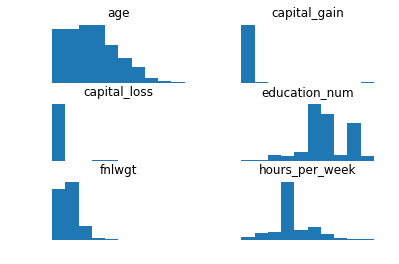

In [17]:
plots = train_raw.hist()
for row in plots:
    for subplot in row:
        subplot.axis('off')
plt.show()

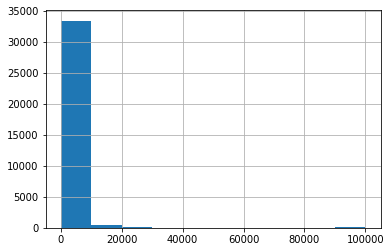

In [7]:
train_raw.capital_gain.hist()
plt.show()

In [8]:
# This appears to not be an outlier after all:
sum(train_raw.capital_gain > 80000)

174

In [21]:
# Note below: capital_gain and capital_loss never appear together.
# Perhaps combine them into one feature.
len(train_raw[(train_raw.capital_gain > 0) & (train_raw.capital_loss > 0)])

0

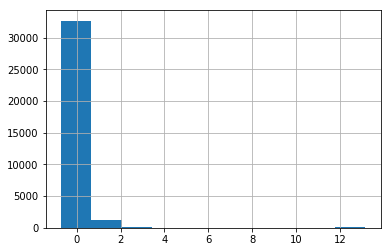

In [12]:
train_X.net_capital.hist()
plt.show()

In [ ]:
#nb = sklearn.svm.SVC(kernel="linear")
#rfe = sklearn.feature_selection.RFECV(nb)
#rfe.fit(train_X, train_y)

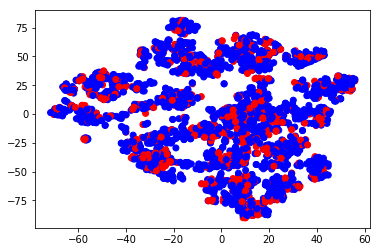

In [8]:
tsne = sklearn.manifold.TSNE(n_components=2)
embed = tsne.fit_transform(train_X[list(features.Feature[:25])].sample(frac=0.1))
#mds = sklearn.manifold.MDS(n_components=2)
#embed = mds.fit_transform(train_X.sample(frac=0.1))
plt.scatter(embed[:,0],embed[:,1],c=list("r" if c else "b" for c in train_y))
plt.show()

In [7]:
for i in np.arange(1, 35):
    dt = sklearn.tree.DecisionTreeClassifier()
    scores = sklearn.model_selection.cross_val_score(
        dt,
        train_X[list(features.Feature[:i])],
        train_y,
        cv=sklearn.model_selection.StratifiedShuffleSplit())
    print(i, scores.mean(), scores.std())

1 0.761626206493 1.11022302463e-16
2 0.831763673589 0.00261866385324
3 0.818572682071 0.00451040931725
4 0.824744077216 0.00612792403337
5 0.836472652822 0.00423939213471
6 0.839221994735 0.00587308851747
7 0.837086867505 0.00613796707321
8 0.834571512138 0.00532158662324
9 0.831441942088 0.00544686617277
10 0.831061713951 0.0049742782564
11 0.830886224042 0.00556917472263
12 0.829394559813 0.0063139118936
13 0.828751096812 0.00521285120962
14 0.826235741445 0.00365884653888
15 0.828136882129 0.00719318370135
16 0.826732962855 0.00337105107557
17 0.825709271717 0.00649345600982
18 0.823925124305 0.00389563004756
19 0.829716291313 0.00589888620811
20 0.829014331676 0.00660934336847
21 0.827785902311 0.00379282014096
22 0.825299795262 0.00465599787741
23 0.823310909623 0.00616223959039
24 0.822491956712 0.00791160249939
25 0.823310909623 0.00471152187925
26 0.818397192161 0.00627640559608
27 0.824042117578 0.0059672303861
28 0.820093594618 0.00474048382939
29 0.822404211758 0.00562268014

In [6]:
for i in np.arange(1, 35):
    nb = sklearn.naive_bayes.GaussianNB()
    scores = sklearn.model_selection.cross_val_score(
        nb,
        train_X[list(features.Feature[:i])],
        train_y,
        cv=sklearn.model_selection.StratifiedShuffleSplit())
    print(i, scores.mean(), scores.std())

1 0.713571219655 0.00558336528924
2 0.710675636151 0.00488858319176
3 0.720035097982 0.00749898588566
4 0.805176952325 0.00495230257777
5 0.832582626499 0.00390922128028
6 0.835624451594 0.00575828005958
7 0.775343667739 0.00784863782643
8 0.755981281076 0.00540745957402
9 0.761392219947 0.0063621647452
10 0.772067856098 0.0048433130811
11 0.797806376133 0.00447040236212
12 0.809798186604 0.00818644700287
13 0.795525007312 0.00836466106978
14 0.762620649313 0.00495877612226
15 0.786224042118 0.00786279443973
16 0.761450716584 0.00844481561667
17 0.791547236034 0.00441068129948
18 0.804591985961 0.0050902998629
19 0.789558350395 0.00734272606647
20 0.798917812226 0.00435446462762
21 0.764200058497 0.00458891106346
22 0.764258555133 0.00977086463205
23 0.80049722141 0.00886224042118
24 0.780608365019 0.0097009665624
25 0.756917227259 0.00774108558651
26 0.775255922784 0.0053151525904
27 0.767183386955 0.00733777293442
28 0.760222287218 0.00722356486717
29 0.761216730038 0.00694756845515


# Use RFECV with decision trees to pick features:

In [9]:
dt = sklearn.tree.DecisionTreeClassifier()
selector = sklearn.feature_selection.RFECV(dt, step=1,
    cv=sklearn.model_selection.StratifiedShuffleSplit())
selector = selector.fit(train_X, train_y)

In [20]:
features = pd.DataFrame(
    {"Feature": list(train_X.columns),
     "RFE rank": selector.ranking_,
    })
features.sort_values("RFE rank", inplace=True, ascending=True)
features.to_csv("rfe_dt.csv", index=False)
print(features)

                                       Feature  RFE rank
102                                net_capital         1
1                                education_num         1
29           marital_status_Married-civ-spouse         1
0                                          age         2
2                               hours_per_week         3
46                            occupation_Sales         4
6                            workclass_Private         5
59                                  race_White         6
36                     occupation_Craft-repair         7
101                                       male         8
98                native_country_United-States         9
37                  occupation_Exec-managerial        10
8                   workclass_Self-emp-not-inc        11
44                   occupation_Prof-specialty        12
4                          workclass_Local-gov        13
54                           relationship_Wife        14
48                 occupation_T

In [17]:
feat_rfe = list(train_X.columns[selector.support_])# + ["age"]
feat_rfe

['education_num', 'marital_status_Married-civ-spouse', 'net_capital']

In [18]:
dt = sklearn.tree.DecisionTreeClassifier()
dt.fit(train_X.loc[:, feat_rfe], train_y)
predict_y = dt.predict(test_X.loc[:,feat_rfe])
print(sklearn.metrics.accuracy_score(test_y, predict_y))
predict_y = dt.predict(train_X.loc[:,feat_rfe])
print(sklearn.metrics.accuracy_score(train_y, predict_y))

0.859073227325
0.863318611249


In [7]:
idxs = [train_X.columns.get_loc(c) for c in feat_rfe]
dt = sklearn.tree.DecisionTreeClassifier()
dt.fit(train_X.iloc[:, idxs], train_y)
predict_y = dt.predict(test_X.iloc[:, idxs])
print(sklearn.metrics.accuracy_score(test_y, predict_y))
predict_y = dt.predict(train_X.iloc[:, idxs])
print(sklearn.metrics.accuracy_score(train_y, predict_y))

0.859073227325
0.863318611249


In [8]:
#columns = ['education_num', 'marital_status_Married-civ-spouse', 'net_capital']
columns = feat_rfe
idxs = [train_X.columns.get_loc(c) for c in columns]
pipeline = sklearn.pipeline.make_pipeline(
    sklearn.preprocessing.FunctionTransformer(lambda x: x[:, idxs]),
    sklearn.tree.DecisionTreeClassifier(),
)
pipeline.fit(train_X, train_y)
predict_y = pipeline.predict(test_X)
print(sklearn.metrics.accuracy_score(test_y, predict_y))
predict_y = pipeline.predict(train_X)
print(sklearn.metrics.accuracy_score(train_y, predict_y))

0.859073227325
0.863318611249


In [39]:
def forward_selection(X, y, estimator, features=None, max_iters=None):
    if features is None:
        features = list(X.columns)
    else:
        features = list(features)
    if max_iters is None:
        max_iters = X.shape[1]
    best_features = []
    incr_accuracy = []
    base_accuracy = 0
    for i in range(max_iters):
        print("Iteration {0}/{1}:".format(i+1, max_iters))
        best_accuracy = 0
        best_feature = None
        for feature in features:
            scores = sklearn.model_selection.cross_val_score(
                estimator,
                X[best_features + [feature]],
                y,
                cv=sklearn.model_selection.StratifiedShuffleSplit())
            acc = scores.mean()
            if (acc > best_accuracy):
                best_feature = feature
                best_accuracy = acc
        if best_accuracy < base_accuracy:
            print("No features improved; quitting")
            break
        print("Feature \"{1}\" raises accuracy from {2} to {3}".format(i, best_feature, base_accuracy, best_accuracy))
        base_accuracy = best_accuracy
        best_features.append(best_feature)
        incr_accuracy.append(best_accuracy)
        print("{0} features: {1}".format(len(best_features), best_features))
        features.remove(best_feature)
    df = pd.DataFrame.from_dict(
        {"Feature": best_features, 
         "Accuracy": incr_accuracy,
        })
    return df

In [40]:
features_nb = forward_selection(train_X, train_y, sklearn.naive_bayes.GaussianNB())
features_nb

Iteration 1/103:


/nix/store/11gkg09dzkvamnfiygipz78m2gjvxrz6-python3-3.5.4-env/lib/python3.5/site-packages/sklearn/naive_bayes.py:432: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/nix/store/11gkg09dzkvamnfiygipz78m2gjvxrz6-python3-3.5.4-env/lib/python3.5/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/nix/store/11gkg09dzkvamnfiygipz78m2gjvxrz6-python3-3.5.4-env/lib/python3.5/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/nix/store/11gkg09dzkvamnfiygipz78m2gjvxrz6-python3-3.5.4-env/lib/python3.5/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/nix/store/11gkg09dzkvamnfiygipz78m2gjvxrz6-python3-3.5.4-env/lib/python3.5/site-packages/sklearn/naive_bayes.py:432: RuntimeWarning: divide by zero encountered in log

Feature "net_capital" raises accuracy from 0 to 0.7943550745832114
1 features: ['net_capital']
Iteration 2/103:
Feature "education_Prof-school" raises accuracy from 0.7943550745832114 to 0.7992395437262358
2 features: ['net_capital', 'education_Prof-school']
Iteration 3/103:
Feature "education_Doctorate" raises accuracy from 0.7992395437262358 to 0.8063468850541093
3 features: ['net_capital', 'education_Prof-school', 'education_Doctorate']
Iteration 4/103:
Feature "occupation_Transport-moving" raises accuracy from 0.8063468850541093 to 0.8078385492834161
4 features: ['net_capital', 'education_Prof-school', 'education_Doctorate', 'occupation_Transport-moving']
Iteration 5/103:
Feature "education_Masters" raises accuracy from 0.8078385492834161 to 0.8092132202398362
5 features: ['net_capital', 'education_Prof-school', 'education_Doctorate', 'occupation_Transport-moving', 'education_Masters']
Iteration 6/103:
Feature "marital_status_Never-married" raises accuracy from 0.8092132202398362 t

,Accuracy,Feature
0,0.794355,net_capital
1,0.799240,education_Prof-school
2,0.806347,education_Doctorate
3,0.807839,occupation_Transport-moving
4,0.809213,education_Masters
5,0.813425,marital_status_Never-married
6,0.815472,education_Bachelors
7,0.817344,relationship_Not-in-family
8,0.827055,occupation_Exec-managerial
9,0.827523,native_country_Ecuador


In [41]:
forward_selection(train_X, train_y, sklearn.naive_bayes.GaussianNB())

Iteration 1/103:
Feature "net_capital" raises accuracy from 0 to 0.7944428195378765
1 features: ['net_capital']
Iteration 2/103:
Feature "occupation_Prof-specialty" raises accuracy from 0.7944428195378765 to 0.8006142146826558
2 features: ['net_capital', 'occupation_Prof-specialty']
Iteration 3/103:
Feature "marital_status_Married-civ-spouse" raises accuracy from 0.8006142146826558 to 0.8121088037437847
3 features: ['net_capital', 'occupation_Prof-specialty', 'marital_status_Married-civ-spouse']
Iteration 4/103:
Feature "relationship_Own-child" raises accuracy from 0.8121088037437847 to 0.8199181047089793
4 features: ['net_capital', 'occupation_Prof-specialty', 'marital_status_Married-civ-spouse', 'relationship_Own-child']
Iteration 5/103:
Feature "occupation_Exec-managerial" raises accuracy from 0.8199181047089793 to 0.8288973384030418
5 features: ['net_capital', 'occupation_Prof-specialty', 'marital_status_Married-civ-spouse', 'relationship_Own-child', 'occupation_Exec-managerial']
I

,Accuracy,Feature
0,0.794443,net_capital
1,0.800614,occupation_Prof-specialty
2,0.812109,marital_status_Married-civ-spouse
3,0.819918,relationship_Own-child
4,0.828897,occupation_Exec-managerial
5,0.836531,race_Amer-Indian-Eskimo


In [43]:
rfe_linearsvc = pd.read_csv("rfe_linearsvc.csv")
rfe_linearsvc

,Feature,RFE rank
0,age,1
1,native_country_Germany,1
2,native_country_France,1
3,native_country_England,1
4,native_country_Dominican-Republic,1
5,native_country_Cuba,1
6,native_country_Columbia,1
7,native_country_China,1
8,native_country_Canada,1
9,native_country_Cambodia,1


In [46]:
features_lsvc = list(rfe_linearsvc[rfe_linearsvc["RFE rank"] <= 1]["Feature"])

In [49]:
svm = sklearn.svm.SVC(kernel="rbf")
svm.fit(train_X.loc[:, features_lsvc], train_y)
predict_y = svm.predict(test_X.loc[:,features_lsvc])
print(sklearn.metrics.accuracy_score(test_y, predict_y))
predict_y = svm.predict(train_X.loc[:,features_lsvc])
print(sklearn.metrics.accuracy_score(train_y, predict_y))

0.845355899816
0.852905905408
